# **AFL 2 - Data Mining**
Megan Rochella 0706022210028

Edward Suwandi 0706022210008

The dataset is about COVID-19 (Corona virus)

- Country: This column likely contains the names of the countries represented in the dataset.
- Other names: This column may include alternative names or aliases for the countries.
- ISO 3166–1 alpha-3 CODE: This column contains the three-letter country codes defined by the ISO 3166–1 standard, which uniquely identify countries.
- Population: This column indicates the population of each country.
- Continent: This column specifies the continent to which each country belongs.
- Total Cases: This column likely refers to the total number of cases (possibly of a disease, such as COVID-19) reported in each country.
- Total Deaths: This column indicates the total number of deaths reported in each country related to the cases mentioned.
- Tot Cases/1M pop: This column may represent the total number of cases per one million population, providing a normalized view of case distribution.
- Tot Deaths/1M pop: This column likely shows the total number of deaths per one million population, similar to the previous column but for deaths.
- Death percentage: This column may represent the percentage of deaths relative to the total cases, giving an insight into the fatality rate of the cases reported.

# **Import Library**
Import all necessary libraries.

In [ ]:
!pip install kneed
from kneed import KneeLocator
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.impute import SimpleImputer
import scipy.cluster.hierarchy as sch

# **Load Data**
Load the dataset into a dataframe.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/mrochella/datamining/refs/heads/main/COVID-19%20Coronavirus.csv')
# Load dataset

df.head(5)
# Show top 5 rows of the data

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


# **Data Cleaning**
An essential first step to ensure the quality and consistency of the dataset.

In [ ]:
# Describe data
df.describe()

# From the summary we can conclude that:
# Population: The data contains a range of populations, from as low as 805 to a maximum of 1,439,324,000
# Total Cases: The total number of cases varies, with the lowest being 1 and the highest being 81,839,050
# Total Deaths: The number of deaths range from 0 to 1,008,222
# Tot Cases/1M pop: This column shows the total cases per 1 million people, ranging from 9 to 696,044
# Tot Deaths/1M pop: This column shows the total deaths per 1 million people, ranging from 0 to 6,286
# Death Percentage: The death percentage ranges from 0% to 18.15%
# This suggests that the data likely represents a diverse set of populations and situations

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


In [ ]:
# Show info
df.info()

# We can see that the total rows are 225 entries and total columns are 10
# The data types are object (4), int64 (5), float64 (1)
# There is only 1 null value in the 'Other Names' column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              224 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


In [ ]:
df.isnull().sum()
# Check for null values in the dataset where we find there is 1 null values

,0
Country,0
Other names,1
ISO 3166-1 alpha-3 CODE,0
Population,0
Continent,0
Total Cases,0
Total Deaths,0
Tot Cases//1M pop,0
Tot Deaths/1M pop,0
Death percentage,0


# **Data Preparation and Transformation**
Properly prepare and transform the data.

In [ ]:
df = df.drop(['Country', 'Other names', 'ISO 3166-1 alpha-3 CODE'], axis = 1)
# Dropping the column 'Country', 'Other names', and 'ISO 3166-1 alpha-3 CODE'

In [ ]:
df.rename(columns={'Tot Cases//1M pop': 'Total Cases/1M pop', 'Tot Deaths/1M pop': 'Total Deaths/1M pop'}, inplace=True)
# Rename 'Tot Cases//1M pop' to 'Total Cases/1M pop' and 'Tot Deaths/1M pop' to 'Total Deaths/1M pop'

df.head()
# Show top 5 rows of the data

,Population,Continent,Total Cases,Total Deaths,Total Cases/1M pop,Total Deaths/1M pop,Death percentage
0,40462186,Asia,177827,7671,4395,190,4.313743
1,2872296,Europe,273870,3492,95349,1216,1.275058
2,45236699,Africa,265691,6874,5873,152,2.587216
3,77481,Europe,40024,153,516565,1975,0.382271
4,34654212,Africa,99194,1900,2862,55,1.915438


In [ ]:
label_encoder = LabelEncoder()

df['Continent'] = label_encoder.fit_transform(df['Continent'])
# Encodes 'Continent' columns to numerical

df.head()
# Show top 5 rows of the data

,Population,Continent,Total Cases,Total Deaths,Total Cases/1M pop,Total Deaths/1M pop,Death percentage
0,40462186,1,177827,7671,4395,190,4.313743
1,2872296,2,273870,3492,95349,1216,1.275058
2,45236699,0,265691,6874,5873,152,2.587216
3,77481,2,40024,153,516565,1975,0.382271
4,34654212,0,99194,1900,2862,55,1.915438


# **Exploratory Data Analysis (EDA)**
Explore the data to identify patterns within the dataset.

<Figure size 1000x600 with 0 Axes>

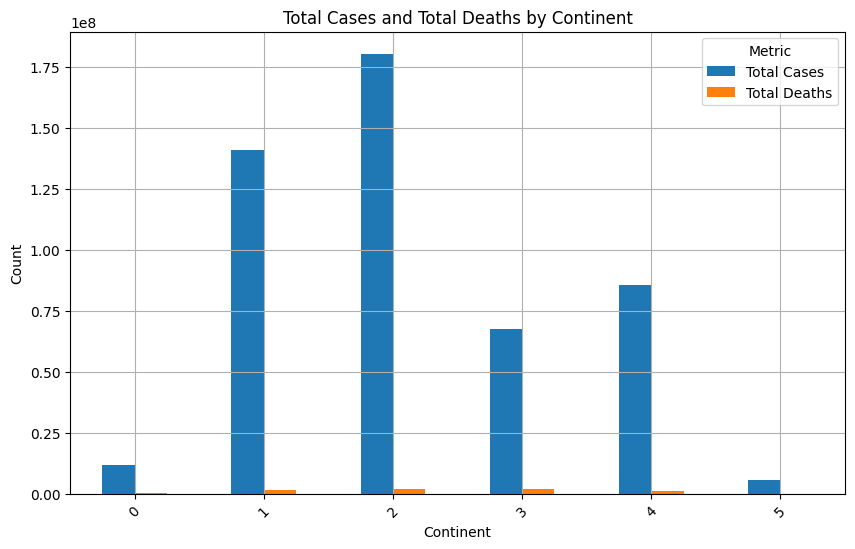

In [ ]:
df_grouped = df.groupby("Continent")[["Total Cases", "Total Deaths"]].sum().reset_index()
plt.figure(figsize=(10, 6))
df_grouped.set_index("Continent")[["Total Cases", "Total Deaths"]].plot(kind="bar", figsize=(10, 6))
plt.title("Total Cases and Total Deaths by Continent")
plt.xlabel("Continent")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Metric")
plt.grid(True)

plt.show()
# Visualize the total cases and deaths per continent

Summary of bar graph above:

- The count of Total Deaths (orange bars) is consistently much smaller than the Total Cases across all continents.
- Continent 2 shows the highest number of Total Cases, significantly outpacing other continents.
- Continent 2 has the highest death count, reflecting its high case count. This pattern is followed by continent 1.
- Continent 2 appears to be the hardest hit in terms of both cases and deaths.
- Continent 5 exhibits the least impact in both cases and deaths, suggesting either a lower population, fewer reported cases, or effective mitigation strategies.

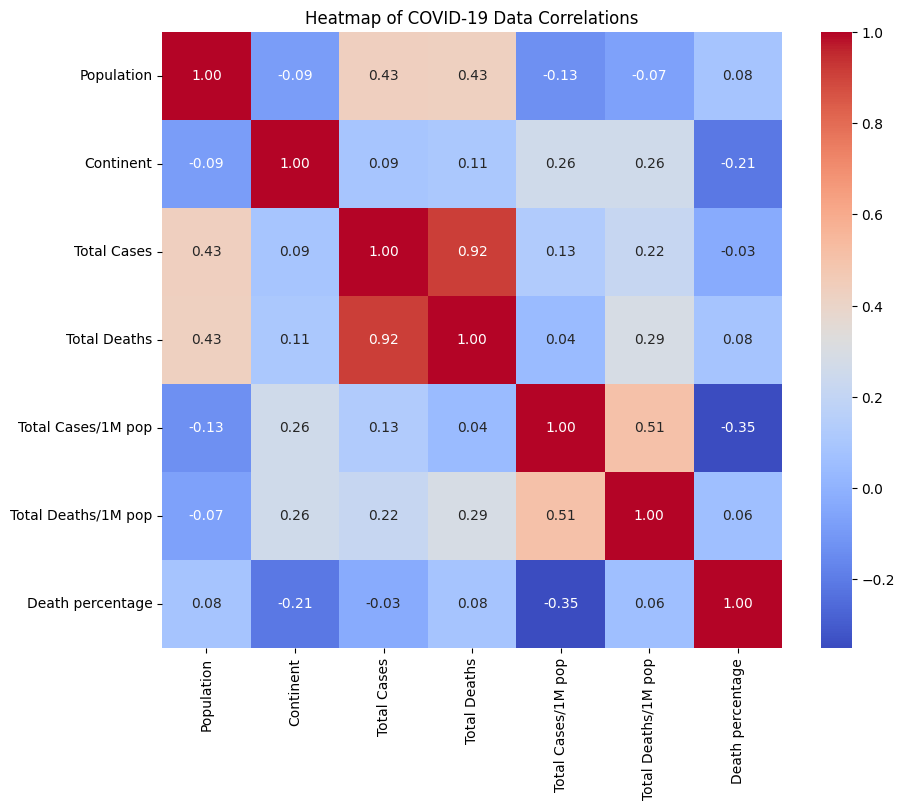

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of COVID-19 Data Correlations")

plt.show()
# Visualize the relationship between the columns.

From what we can see, the correlation between various COVID-19-related metrics are:
- Population positively correlated with Total Cases (0.43) and Total Deaths (0.43), suggesting that larger populations tend to report higher absolute numbers of cases and deaths.
- Continent shows weak correlations with most metrics. Notably, a slight negative correlation (-0.21) with Death Percentage.
- Total Cases strongly correlated with Total Deaths (0.92), indicating that countries with more cases also tend to have more deaths in absolute terms.
- Total Deaths has strong positive correlation with Total Cases (0.92).
- Total Cases/1M Population has moderate positive correlation with Total Deaths/1M Population (0.51).
- Total Deaths/1M Population has moderate correlation with Total Cases/1M Population (0.51).
- Death Percentage has weak correlations with most metrics. Notably, it has a slight negative correlation with Total Cases/1M Population (-0.35) and Continent (-0.21).

In [ ]:
sc = StandardScaler()

df_scaled = pd.DataFrame(sc.fit_transform(df), columns=df.columns)
# Scalling data

df_scaled.head()
# Show top 5 rows of the data

,Population,Continent,Total Cases,Total Deaths,Total Cases/1M pop,Total Deaths/1M pop,Death percentage
0,0.038789,-0.509986,-0.276449,-0.204571,-0.915487,-0.759994,1.651243
1,-0.231774,0.168989,-0.263220,-0.247798,-0.287081,0.099982,-0.097285
2,0.073154,-1.188960,-0.264347,-0.212815,-0.905275,-0.791845,0.657760
3,-0.251891,0.168989,-0.295431,-0.282336,2.623123,0.736164,-0.611015
4,-0.003016,-1.188960,-0.287281,-0.264265,-0.926078,-0.873149,0.271204


# **K-Means Clustering**

Using the elbow method and determining the number of clusters to be formed.

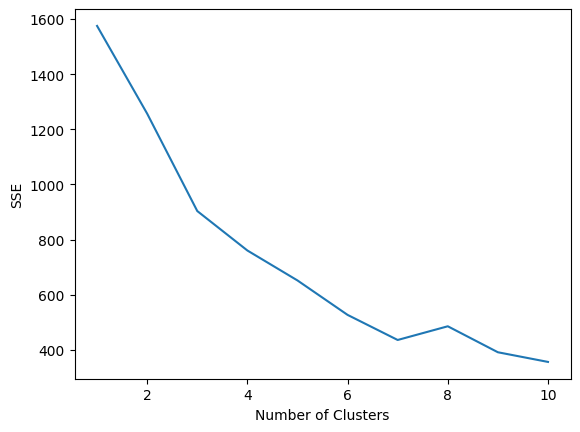

In [ ]:
# K-Means Clustering
sse = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init ='random', max_iter=300, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1,11), sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

plt.show()
# Use 'elbow method' to help determine how many clusters are optimal in order to identify the point where the SSE starts to decrease more slowly
# This point is regarded as the ideal number of clusters, as incorporating additional clusters beyond this stage does not substantially enhance the fit and instead adds complexity

In [ ]:
# Create an instance of KneeLocator to identify the optimal number of clusters
kl = KneeLocator(range(1, 11), sse, curve='convex', direction='decreasing')
optimal_k = kl.elbow

print(f"The best k for your model is : {optimal_k}")
# This algorithm assists in determining the most suitable number of clusters, supporting the earlier statement

The best k for your model is : 4


Train the K-Means model on the dataset with the number of clusters we have determined.

In [ ]:
kmeans = KMeans(n_clusters=kl.elbow, init ='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(df_scaled)
y_pred

# Training the KMeans model for clustering with the number of clusters set to 4
# This aims to group the data into distinct clusters or categories

array([0, 3, 0, 1, 0, 3, 3, 1, 1, 1, 3, 1, 0, 3, 1, 0, 3, 3, 1, 3, 0, 3,
       0, 3, 1, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 3, 0, 1, 3, 0, 1, 1, 0, 1,
       0, 0, 3, 3, 1, 3, 1, 1, 1, 1, 0, 3, 3, 0, 3, 0, 3, 0, 0, 1, 0, 0,
       1, 3, 3, 3, 1, 3, 3, 0, 0, 1, 1, 0, 1, 1, 3, 3, 1, 3, 0, 0, 3, 3,
       3, 0, 1, 1, 2, 0, 0, 0, 1, 1, 1, 1, 0, 3, 0, 1, 0, 0, 3, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 3, 1, 0, 0, 0, 1, 3,
       1, 1, 0, 1, 3, 0, 0, 0, 0, 0, 1, 3, 3, 3, 0, 0, 3, 1, 3, 0, 0, 3,
       0, 3, 3, 3, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 3, 3, 1, 3, 3, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 3, 0, 0, 0, 1, 0, 1, 3, 0, 3, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 3, 3, 0, 1, 3, 0, 0, 1, 1, 1, 2, 0, 3, 3, 3, 0,
       3, 0, 0, 0, 0], dtype=int32)

In [ ]:
df_inverse = pd.DataFrame(sc.inverse_transform(df_scaled), columns=df_scaled.columns)

df_inverse['KMeans'] = y_pred
# Inverse transform the scaled data to get the original values

df_inverse.head(5)
# Show top 5 rows of the data

,Population,Continent,Total Cases,Total Deaths,Total Cases/1M pop,Total Deaths/1M pop,Death percentage,KMeans
0,40462186.0,1.000000e+00,177827.0,7671.0,4395.0,190.0,4.313743,0
1,2872296.0,2.000000e+00,273870.0,3492.0,95349.0,1216.0,1.275058,3
2,45236699.0,2.220446e-16,265691.0,6874.0,5873.0,152.0,2.587216,0
3,77481.0,2.000000e+00,40024.0,153.0,516565.0,1975.0,0.382271,1
4,34654212.0,2.220446e-16,99194.0,1900.0,2862.0,55.0,1.915438,0


In [ ]:
# aggregation

cluster_summary = df_inverse.groupby('KMeans').agg({
    'Population': ['mean', 'min', 'max'],
    'Continent' : [pd.Series.mode, 'min', 'max'],
    'Total Cases' : ['mean', 'min', 'max'],
    'Total Deaths' : ['mean', 'min', 'max'],
    'Total Cases/1M pop' : ['mean', 'min', 'max'],
    'Total Deaths/1M pop' : ['mean', 'min', 'max'],
    'Death percentage' : ['mean', 'min', 'max']
})

cluster_summary.T
# Transposing the summary for better readability and displaying the transposed cluster summary
# This process generates detailed statistics for each column within each cluster
# It can be used to interpret the characteristics of each cluster, draw conclusions, and subsequently predict the cluster membership of new data points

KMeans                                  0                1                 2  \
Population          mean  48236018.870968  16728442.816901  651119826.333333   
                    min            6109.0           9930.0       215204501.0   
                    max      1439323776.0      146044010.0      1403754381.0   
Continent           mode              0.0              2.0   [1.0, 3.0, 4.0]   
                    min               0.0              0.0               1.0   
                    max               1.0              3.0               4.0   
Total Cases         mean    757415.043011   3452822.760563   51622637.333333   
                    min               2.0           4150.0        29999816.0   
                    max         9818328.0       25997852.0        81839052.0   
Total Deaths        mean     10291.107527     39560.169014     729959.666667   
                    min               0.0              6.0          521388.0   
                    max          155288.0         369708.0         1008222.0   
Total Cases/1M pop  mean     31716.924731    300627.760563     138262.666667   
                    min              16.0          43147.0           30653.0   
                    max          187113.0         696044.0          244734.0   
Total Deaths/1M pop mean       330.021505      2246.056338       2151.333333   
                    min               0.0            293.0             371.0   
                    max            2353.0           6286.0            3068.0   
Death percentage    mean         1.970174          1.06769          1.548193   
                    min               0.0         0.055546          1.211712   
                    max         18.151787         5.983499           2.20091   

KMeans                                 3  
Population          mean  4559362.051724  
                    min            805.0  
                    max       38321435.0  
Continent           mode             3.0  
                    min              2.0  
                    max              5.0  
Total Cases         mean   364101.724138  
                    min              1.0  
                    max        4680816.0  
Total Deaths        mean     3794.913793  
                    min              0.0  
                    max          37690.0  
Total Cases/1M pop  mean   105061.224138  
                    min              9.0  
                    max         340703.0  
Total Deaths/1M pop mean      864.568966  
                    min              0.0  
                    max           2669.0  
Death percentage    mean        1.056058  
                    min              0.0  
                    max         4.119248

In [ ]:
df_inverse['KMeans'].value_counts().sort_index()
# Count data from each cluster to see the distribution of clusters

,count
KMeans,
0,93
1,71
2,3
3,58


## **Interpretation**

Cluster 0 :
- This cluster is the second highest average population with highest death percentage.
- The average covid cases per million population is very small, showing that the spread of covid is small, but those who contracted the virus had a relatively high death percentage, hinting at potential weaknesses in healthcare response.

Cluster 1 :
- This cluster has the moderate size of populations with highest total cases per million, showing high infection rate.
- However, the death percentage level is low, indicating better medical outcomes.

Cluster 2 :
- This cluster has the largest population size. While having the highest total cases due to large populations, this cluster has a moderate cases per million figure. Although has high death numbers due to its large population base, this cluster maintains a moderate death percentage.

Cluster 3 :
- This cluster has the smallest population size with moderate covid cases per million, indicating small but severe localized outbreaks.
- It has the lowest death percentage, suggesting that the regions in this cluster achieved better medical outcomes compared to other clusters.

# **Hierarchical Clustering**
Hierarchical clustering uses the agglomerative method.

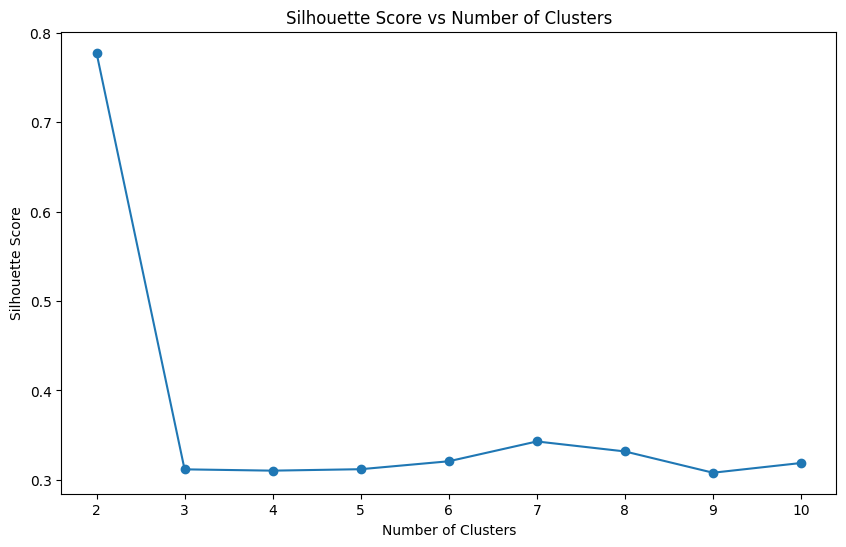

The best number of clusters is: 2


In [ ]:
silhouette_scores = []
k_range = range(2, 11)
# Calculate silhouette scores for different numbers of clusters using Agglomerative Clustering

for k in k_range:
    agglomerative = AgglomerativeClustering(n_clusters=k, linkage='ward')
    cluster_labels = agglomerative.fit_predict(df_scaled)
    # Loop through the range of cluster numbers to calculate silhouette scores

    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    # Calculate the silhouette score for the current number of clusters

plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()
# Plotting the silhouette scores against the number of clusters

best_k = k_range[np.argmax(silhouette_scores)]
print(f"The best number of clusters is: {best_k}")
# Determine the best number of clusters based on the highest silhouette score

# This process helps identify the optimal number of clusters by evaluating how well-separated the clusters are
# A higher silhouette score indicates better-defined clusters, assisting in making an informed decision for clustering

In [ ]:
# agglomerative clustering

agglo = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_pred = agglo.fit_predict(df_scaled)

In [ ]:
df_inverse2 = pd.DataFrame(sc.inverse_transform(df_scaled), columns=df_scaled.columns)
# Adding the cluster labels to the original data that we have been added with kmeans so we have a full dataframe include kmeans and agglo clustering

df_inverse2['Agglo'] = y_pred

df_inverse2.head()
# Show top 5 rows of the data

,Population,Continent,Total Cases,Total Deaths,Total Cases/1M pop,Total Deaths/1M pop,Death percentage,Agglo
0,40462186.0,1.000000e+00,177827.0,7671.0,4395.0,190.0,4.313743,0
1,2872296.0,2.000000e+00,273870.0,3492.0,95349.0,1216.0,1.275058,0
2,45236699.0,2.220446e-16,265691.0,6874.0,5873.0,152.0,2.587216,0
3,77481.0,2.000000e+00,40024.0,153.0,516565.0,1975.0,0.382271,0
4,34654212.0,2.220446e-16,99194.0,1900.0,2862.0,55.0,1.915438,0


In [ ]:
# aggregation

cluster_summary_2 = df_inverse2.groupby('Agglo').agg({
    'Population': ['mean', 'min', 'max'],
    'Continent' : [pd.Series.mode, 'min', 'max'],
    'Total Cases' : ['mean', 'min', 'max'],
    'Total Deaths' : ['mean', 'min', 'max'],
    'Total Cases/1M pop' : ['mean', 'min', 'max'],
    'Total Deaths/1M pop' : ['mean', 'min', 'max'],
    'Death percentage' : ['mean', 'min', 'max']
})

cluster_summary_2.T

Agglo                                0             1
Population          mean  2.123420e+07  1.059160e+09
                    min   8.050000e+02  3.344006e+08
                    max   2.785865e+08  1.439324e+09
Continent           mode  2.220446e-16  1.000000e+00
                    min   2.220446e-16  1.000000e+00
                    max   5.000000e+00  4.000000e+00
Total Cases         mean  1.651140e+06  4.167428e+07
                    min   1.000000e+00  1.547380e+05
                    max   2.999982e+07  8.183905e+07
Total Deaths        mean  2.090802e+04  5.114160e+05
                    min   0.000000e+00  4.638000e+03
                    max   6.602690e+05  1.008222e+06
Total Cases/1M pop  mean  1.375094e+05  9.183167e+04
                    min   9.000000e+00  1.080000e+02
                    max   6.960440e+05  2.447340e+05
Total Deaths/1M pop mean  1.096270e+03  1.129667e+03
                    min   0.000000e+00  3.000000e+00
                    max   6.286000e+03  3.015000e+03
Death percentage    mean  1.439131e+00  1.813664e+00
                    min   0.000000e+00  1.211712e+00
                    max   1.815179e+01  2.997325e+00

In [ ]:
df_inverse2['Agglo'].value_counts().sort_index()

,count
Agglo,
0,222
1,3


## **Interpretation**

Cluster 0 :
- This cluster has smaller population than cluster 1 with high average cases per million.
- Although, this country has lower death percentage, indicating regions that managed COVID-19 very well.

Cluster 1 :
- This cluster has bigger population with lower average cases per million but has high death percentage.
- This indicates the low spread of covid19 but the one who got infected has high percentage of death.

# **Hierarchical Visualization**

Single Linkage

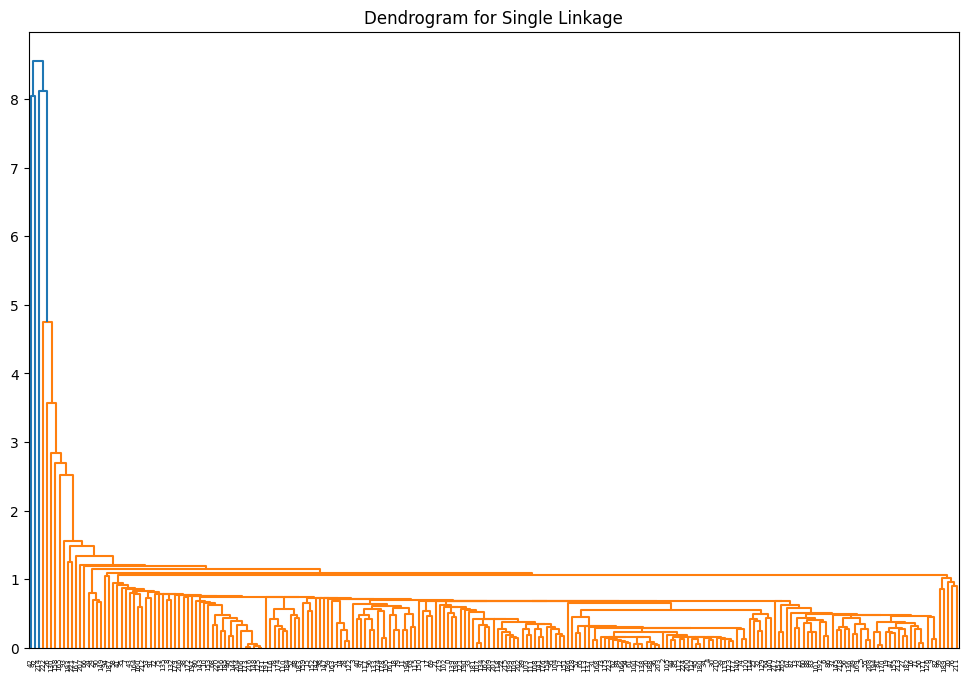

In [ ]:
plt.figure(figsize=(12, 8))
plt.title("Dendrogram for Single Linkage")
dend = sch.dendrogram(sch.linkage(df_scaled, method='single'))

plt.show()

Complete Linkage

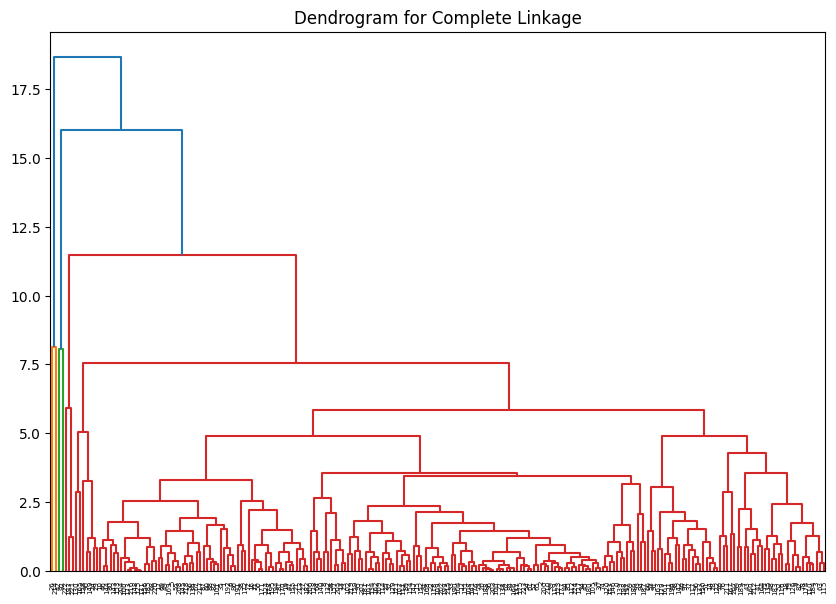

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Complete Linkage")
dend = sch.dendrogram(sch.linkage(df_scaled, method='complete'))

plt.show()

Average Linkage

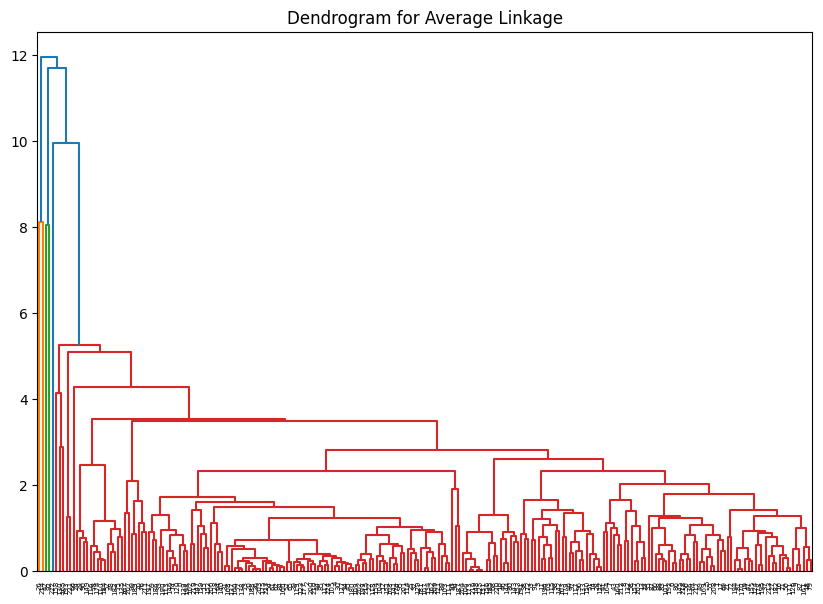

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Average Linkage")
dend = sch.dendrogram(sch.linkage(df_scaled, method='average'))

plt.show()

Ward Method

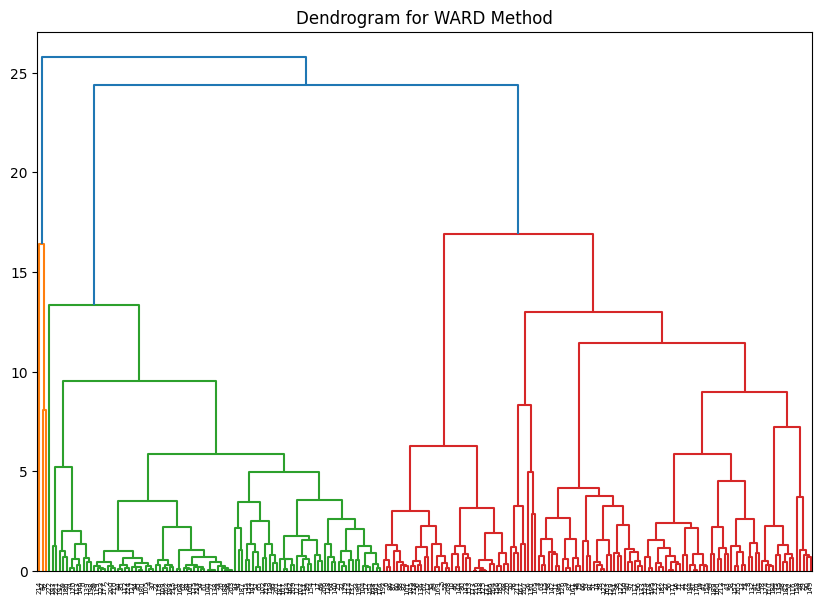

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for WARD Method")
dend = sch.dendrogram(sch.linkage(df_scaled, method='ward'))

plt.show()